In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

# **MobileNetV2**

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers,models
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout
import matplotlib.pyplot as plt


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train"
val_dir   = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val"

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=(224,224), batch_size=32, class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=(224,224), batch_size=32, class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
 #

# ***For this you can also Apply DataAgumentation***

In [8]:
test_gen = test_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

Found 16 images belonging to 2 classes.


In [14]:
test_gen


In [16]:
base_model=MobileNetV2(weights="imagenet",include_top=False,input_shape=(224,224,3))
base_model.trainable=False

2025-10-27 03:24:54.697296: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
model=models.Sequential([base_model,
                         GlobalAveragePooling2D(),
                         Dense(128,activation='relu'),
                         Dropout(0.3),
                         Dense(1,activation='sigmoid')
                        ])

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [23]:
history=model.fit(train_gen,validation_data=test_gen,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.8743 - loss: 0.3216 - val_accuracy: 0.5625 - val_loss: 0.8365
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 915ms/step - accuracy: 0.9679 - loss: 0.0971 - val_accuracy: 0.8750 - val_loss: 0.2150
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 908ms/step - accuracy: 0.9717 - loss: 0.0815 - val_accuracy: 0.8750 - val_loss: 0.1355
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 149s 912ms/step - accuracy: 0.9763 - loss: 0.0707 - val_accuracy: 0.8750 - val_loss: 0.3354
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 148s 909ms/step - accuracy: 0.9819 - loss: 0.0496 - val_accuracy: 0.8750 - val_loss: 0.1697


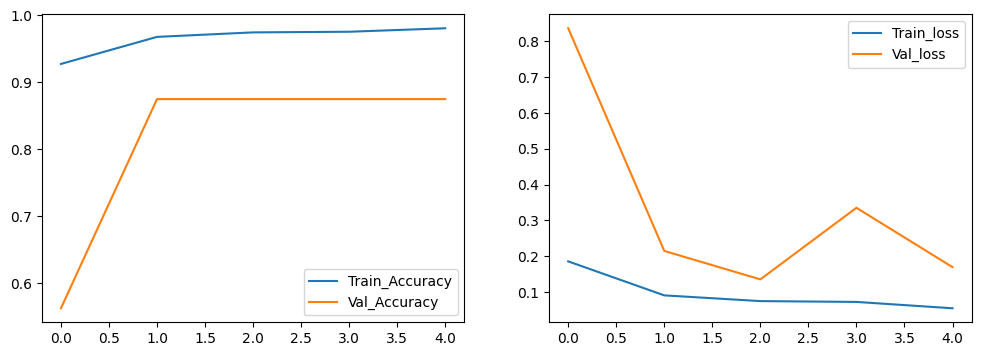

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train_Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train_loss')
plt.plot(history.history['val_loss'],label='Val_loss')
plt.legend()
plt.show()

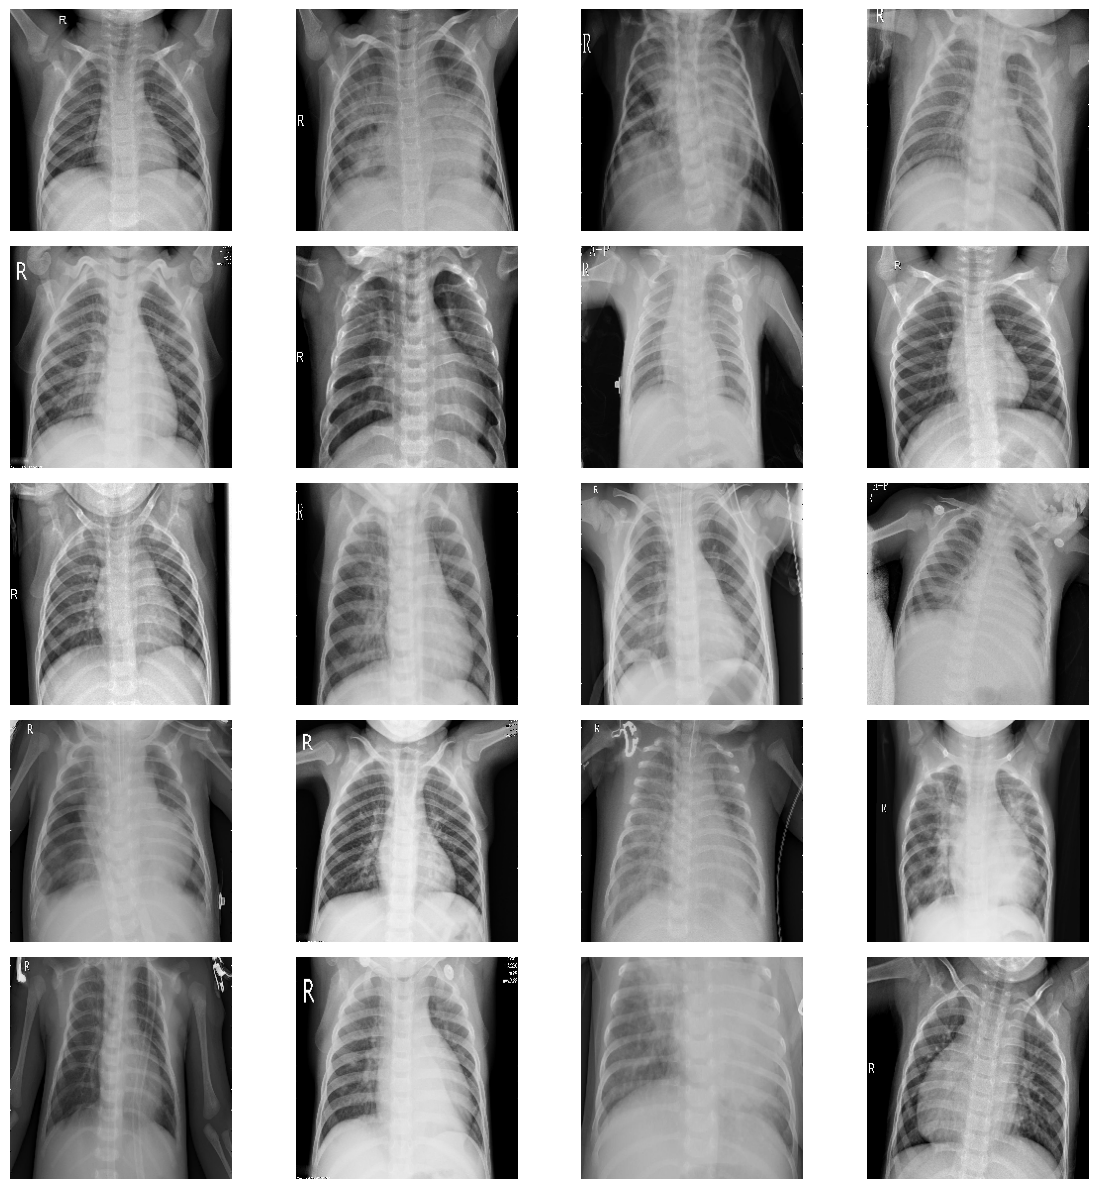

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Get one batch
X_batch, y_batch = next(train_gen)  # shape: (batch_size, 224, 224, 3)

# Pick 20 random indices from the batch
indices = random.sample(range(X_batch.shape[0]), 20)

plt.figure(figsize=(12,12))
for i, idx in enumerate(indices):
    plt.subplot(5,4,i+1)
    plt.imshow(X_batch[idx])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [1]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preproccesing.image import ImageDataGenerator


2025-10-27 06:18:34.428524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761545914.686273      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761545914.767409      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from tensorflow.keras.layers import Dense,Droput,MaxPooling2D

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train"
val_dir   = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val"


In [7]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
train_gen=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=16,class_mode='binary')
test_gen=test_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=16,class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# **Manually Built**

In [13]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu",padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 72, 72, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 72, 72, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,930,561 (18.81 MB)

 Trainable params: 4,929,729 (18.81 MB)

 Non-trainable params: 832 (3.25 KB)

In [15]:
model.compile(optimizer=Adam(learning_rate=0.003),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(train_gen,epochs=10,validation_data=test_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 328s 986ms/step - accuracy: 0.8664 - loss: 0.3210 - val_accuracy: 0.5625 - val_loss: 1.8616
Epoch 2/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 381s 985ms/step - accuracy: 0.9485 - loss: 0.1339 - val_accuracy: 0.5000 - val_loss: 7.1491
Epoch 3/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 321s 985ms/step - accuracy: 0.9587 - loss: 0.1220 - val_accuracy: 0.5000 - val_loss: 4.8243
Epoch 4/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 324s 992ms/step - accuracy: 0.9612 - loss: 0.1064 - val_accuracy: 0.7500 - val_loss: 0.7414
Epoch 5/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 432s 1s/step - accuracy: 0.9665 - loss: 0.0917 - val_accuracy: 0.8750 - val_loss: 0.2151
Epoch 6/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 323s 989ms/step - accuracy: 0.9732 - loss: 0.0765 - val_accuracy: 0.6875 - val_loss: 0.7143
Epoch 7/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 366s 942ms/step - accuracy: 0.9768 - loss: 0.0711 - val_accuracy: 0.5000 - val_loss: 16.0815
Epoch 8/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 305s 935ms/step - accuracy: 0.9676 - l

In [37]:
model.save("pneumonia_model_custom.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
✅ Classification Report:
              precision    recall  f1-score   support

      Normal       0.62      0.62      0.62         8
   Pneumonia       0.62      0.62      0.62         8

    accuracy                           0.62        16
   macro avg       0.62      0.62      0.62        16
weighted avg       0.62      0.62      0.62        16



<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


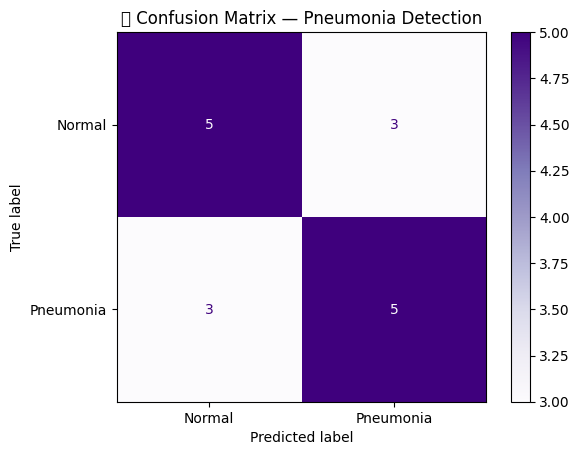

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


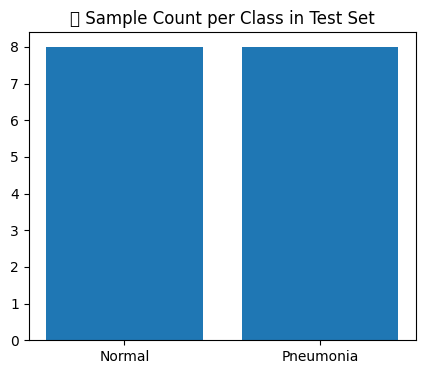

✅ Overall Test Accuracy: 62.50%


In [65]:
# ===============================================================
# 📊 Step — Model Evaluation & Confusion Matrix
# ===============================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

# Load the saved model (optional if already in memory)
#model = load_model("pneumonia_mobilenetv2.h5")

# Get predictions on test data
y_pred_prob = model.predict(test_gen)
y_pred = (y_pred_prob > 0.9).astype("int32").flatten()
y_true = test_gen.classes

# ===============================================================
# 🧮 Classification Metrics
# ===============================================================
print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))

# ===============================================================
# 🔢 Confusion Matrix
# ===============================================================
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Pneumonia"])

plt.figure(figsize=(6,6))
disp.plot(cmap='Purples', values_format='d')
plt.title("🩺 Confusion Matrix — Pneumonia Detection")
plt.show()

# ===============================================================
# 📈 Accuracy Visualization
# ===============================================================
plt.figure(figsize=(5,4))
plt.bar(["Normal", "Pneumonia"], cm.sum(axis=1))
plt.title("📊 Sample Count per Class in Test Set")
plt.show()

# ===============================================================
# ✅ Overall Accuracy
# ===============================================================
acc = np.mean(y_true == y_pred)
print(f"✅ Overall Test Accuracy: {acc*100:.2f}%")


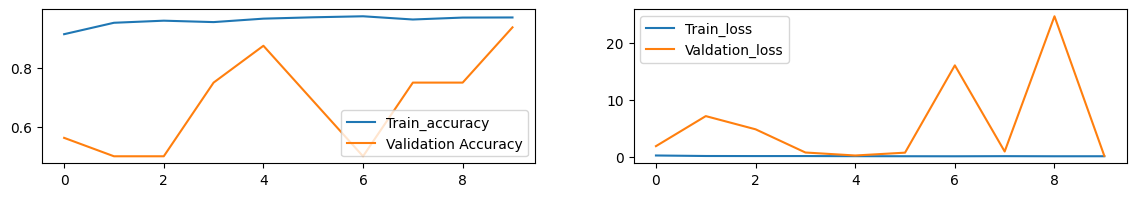

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,2))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train_accuracy')
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train_loss')
plt.plot(history.history['val_loss'],label="Valdation_loss")
plt.legend()
plt.show()

# **VGG16**

In [28]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models

In [29]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))


In [30]:
conv_base.trainable=False

In [34]:
model1=models.Sequential([conv_base,
                         GlobalAveragePooling2D(),
                         Dense(128,activation='relu'),
                         Dropout(0.5),
                         Dense(64,activation='relu'),
                         Dropout(0.5),
                         Dense(1,activation='sigmoid')
                        ])

In [35]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,788,673 (56.41 MB)

 Trainable params: 73,985 (289.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [38]:
model1.compile(optimizer=Adam(),loss="binary_crossentropy",metrics=['accuracy'])
history1=model1.fit(train_gen,epochs=5,validation_data=test_gen)

Epoch 1/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 643s 2s/step - accuracy: 0.8326 - loss: 0.3667 - val_accuracy: 0.8125 - val_loss: 0.3970
Epoch 2/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 688s 2s/step - accuracy: 0.9353 - loss: 0.1771 - val_accuracy: 0.8125 - val_loss: 0.3579
Epoch 3/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.9407 - loss: 0.1510 - val_accuracy: 0.7500 - val_loss: 0.3604
Epoch 4/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 634s 2s/step - accuracy: 0.9444 - loss: 0.1437 - val_accuracy: 0.7500 - val_loss: 0.3251
Epoch 5/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.9521 - loss: 0.1362 - val_accuracy: 0.7500 - val_loss: 0.3720


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
✅ Classification Report:
              precision    recall  f1-score   support

      Normal       0.50      0.25      0.33         8
   Pneumonia       0.50      0.75      0.60         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.47        16
weighted avg       0.50      0.50      0.47        16



<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


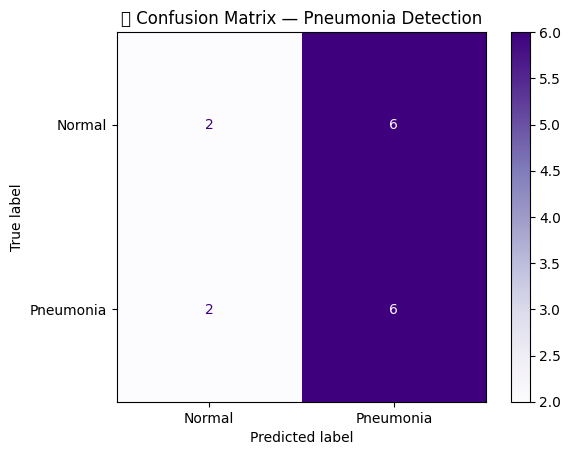

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


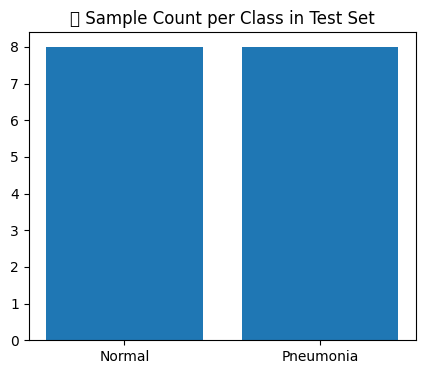

✅ Overall Test Accuracy: 50.00%


In [47]:
# ===============================================================
# 📊 Step — Model Evaluation & Confusion Matrix
# ===============================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

# Load the saved model (optional if already in memory)
#model = load_model("pneumonia_mobilenetv2.h5")

# Get predictions on test data
y_pred_prob = model1.predict(test_gen)
y_pred = (y_pred_prob > 0.8 ).astype("int32").flatten()
y_true = test_gen.classes

# ===============================================================
# 🧮 Classification Metrics
# ===============================================================
print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))

# ===============================================================
# 🔢 Confusion Matrix
# ===============================================================
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Pneumonia"])

plt.figure(figsize=(6,6))
disp.plot(cmap='Purples', values_format='d')
plt.title("🩺 Confusion Matrix — Pneumonia Detection")
plt.show()

# ===============================================================
# 📈 Accuracy Visualization
# ===============================================================
plt.figure(figsize=(5,4))
plt.bar(["Normal", "Pneumonia"], cm.sum(axis=1))
plt.title("📊 Sample Count per Class in Test Set")
plt.show()

# ===============================================================
# ✅ Overall Accuracy
# ===============================================================
acc = np.mean(y_true == y_pred)
print(f"✅ Overall Test Accuracy: {acc*100:.2f}%")


In [48]:
model1.save("vgg16.h5")


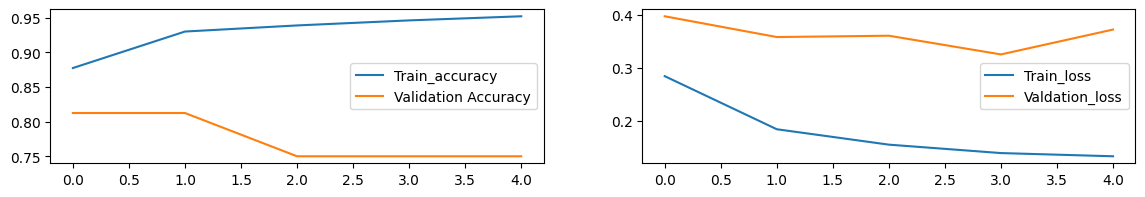

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,2))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'],label='Train_accuracy')
plt.plot(history1.history['val_accuracy'],label="Validation Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history1.history['loss'],label='Train_loss')
plt.plot(history1.history['val_loss'],label="Valdation_loss")
plt.legend()
plt.show()

# **RESNET**

In [40]:
from tensorflow.keras.applications import ResNet50
con_base1=ResNet50(weights='imagenet',include_top=False,input_shape=(150,150,3))



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [42]:
con_base1.trainable=False


In [50]:
model2=models.Sequential([con_base1,
                         GlobalAveragePooling2D(),
                         Dense(128,activation='relu'),
                         Dropout(0.5),
                         Dense(64,activation='relu'),
                         Dropout(0.5),
                         Dense(1,activation='sigmoid')
                        ])

In [51]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,858,305 (91.01 MB)

 Trainable params: 270,593 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [52]:
model2.compile(optimizer=Adam(),loss="binary_crossentropy",metrics=['accuracy'])
history2=model2.fit(train_gen,epochs=5,validation_data=test_gen)

Epoch 1/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 240s 698ms/step - accuracy: 0.7155 - loss: 0.6026 - val_accuracy: 0.5000 - val_loss: 0.8118
Epoch 2/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 223s 684ms/step - accuracy: 0.7445 - loss: 0.5595 - val_accuracy: 0.5000 - val_loss: 0.8122
Epoch 3/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 227s 695ms/step - accuracy: 0.7446 - loss: 0.4866 - val_accuracy: 0.5000 - val_loss: 0.8285
Epoch 4/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 233s 715ms/step - accuracy: 0.7311 - loss: 0.4565 - val_accuracy: 0.5000 - val_loss: 0.9213
Epoch 5/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 234s 717ms/step - accuracy: 0.7430 - loss: 0.4558 - val_accuracy: 0.5000 - val_loss: 0.7344


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
✅ Classification Report:
              precision    recall  f1-score   support

      Normal       0.50      0.62      0.56         8
   Pneumonia       0.50      0.38      0.43         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.49        16
weighted avg       0.50      0.50      0.49        16



<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


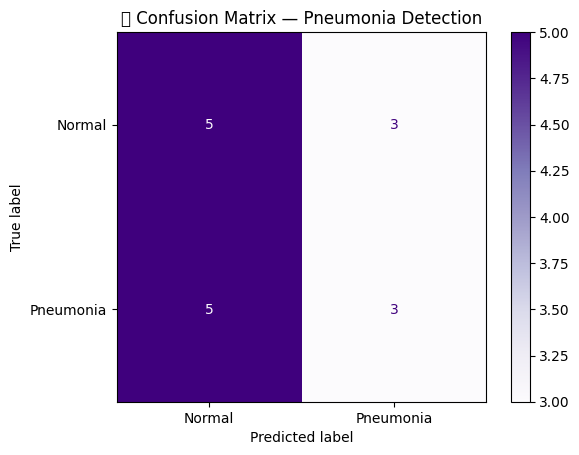

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


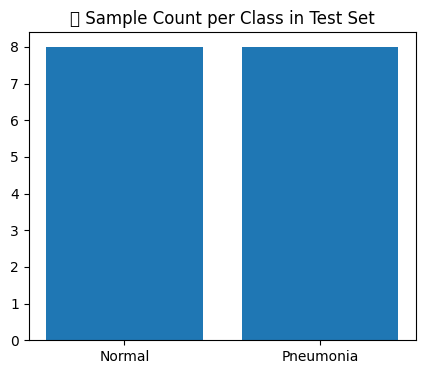

✅ Overall Test Accuracy: 50.00%


In [53]:
# ===============================================================
# 📊 Step — Model Evaluation & Confusion Matrix
# ===============================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

# Load the saved model (optional if already in memory)
#model = load_model("pneumonia_mobilenetv2.h5")

# Get predictions on test data
y_pred_prob = model2.predict(test_gen)
y_pred = (y_pred_prob > 0.8).astype("int32").flatten()
y_true = test_gen.classes

# ===============================================================
# 🧮 Classification Metrics
# ===============================================================
print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))

# ===============================================================
# 🔢 Confusion Matrix
# ===============================================================
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Pneumonia"])

plt.figure(figsize=(6,6))
disp.plot(cmap='Purples', values_format='d')
plt.title("🩺 Confusion Matrix — Pneumonia Detection")
plt.show()

# ===============================================================
# 📈 Accuracy Visualization
# ===============================================================
plt.figure(figsize=(5,4))
plt.bar(["Normal", "Pneumonia"], cm.sum(axis=1))
plt.title("📊 Sample Count per Class in Test Set")
plt.show()

# ===============================================================
# ✅ Overall Accuracy
# ===============================================================
acc = np.mean(y_true == y_pred)
print(f"✅ Overall Test Accuracy: {acc*100:.2f}%")


In [ ]:
model2.save("pneumonia_model_custom_resnet.h5")

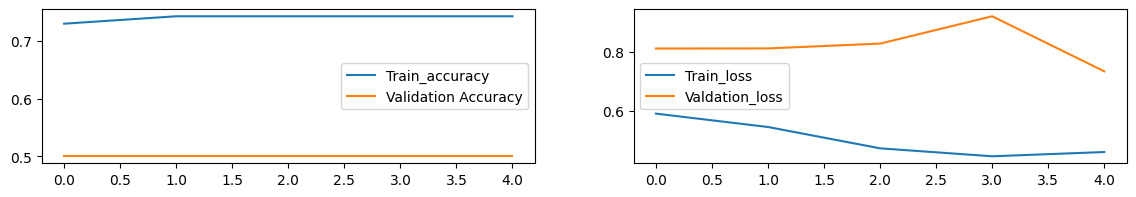

In [55]:
plt.figure(figsize=(14,2))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'],label='Train_accuracy')
plt.plot(history2.history['val_accuracy'],label="Validation Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history2.history['loss'],label='Train_loss')
plt.plot(history2.history['val_loss'],label="Valdation_loss")
plt.legend()
plt.show()

# **ConvNeXtBase**

In [57]:
from tensorflow.keras.applications import ConvNeXtBase
conv_base2=ConvNeXtBase(weights='imagenet',include_top=False,input_shape=(150,150,3))
conv_base2.trainable=False



350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [67]:
model3=models.Sequential([conv_base2,
                         MaxPooling2D(),
                        
                         Dense(128,activation='relu'),
                         Dropout(0.5),
                         Dense(64,activation='relu'),
                         Dropout(0.5),
                         Dense(1,activation='sigmoid')
                        ])

In [68]:
model3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convnext_base (Functional)      │ (None, 4, 4, 1024)     │    87,566,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,099,201 (336.07 MB)

 Trainable params: 532,737 (2.03 MB)

 Non-trainable params: 87,566,464 (334.04 MB)

In [66]:
model3.compile(optimizer=Adam(),loss="binary_crossentropy",metrics=['accuracy'])
history3=model3.fit(train_gen,epochs=5,validation_data=test_gen)

Epoch 1/5


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2, 2, 1)

In [ ]:
# ===============================================================
# 📊 Step — Model Evaluation & Confusion Matrix
# ===============================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

# Load the saved model (optional if already in memory)
#model = load_model("pneumonia_mobilenetv2.h5")

# Get predictions on test data
y_pred_prob = model3.predict(test_gen)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()
y_true = test_gen.classes

# ===============================================================
# 🧮 Classification Metrics
# ===============================================================
print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))

# ===============================================================
# 🔢 Confusion Matrix
# ===============================================================
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Pneumonia"])

plt.figure(figsize=(6,6))
disp.plot(cmap='Purples', values_format='d')
plt.title("🩺 Confusion Matrix — Pneumonia Detection")
plt.show()

# ===============================================================
# 📈 Accuracy Visualization
# ===============================================================
plt.figure(figsize=(5,4))
plt.bar(["Normal", "Pneumonia"], cm.sum(axis=1))
plt.title("📊 Sample Count per Class in Test Set")
plt.show()

# ===============================================================
# ✅ Overall Accuracy
# ===============================================================
acc = np.mean(y_true == y_pred)
print(f"✅ Overall Test Accuracy: {acc*100:.2f}%")


In [ ]:
model3.save("pneumonia_model_convnet.h5")

In [ ]:
plt.figure(figsize=(14,2))
plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'],label='Train_accuracy')
plt.plot(history3.history['val_accuracy'],label="Validation Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history3.history['loss'],label='Train_loss')
plt.plot(history3.history['val_loss'],label="Valdation_loss")
plt.legend()
plt.show()

In [ ]:
#DataAgumentation
#ReadNoteBooksOfOthers